## CƠ BẢN VỀ PYTORCH

In [1]:
!pip install pytorch


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for pytorch
Failed to build pytorch


  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [6 lines of output]
  Traceback (most recent call last):
    File "<string>", line 2, in <module>
    File "<pip-setuptools-caller>", line 34, in <module>
    File "C:\Users\Laptop\AppData\Local\Temp\pip-install-rfx89abv\pytorch_605933bfd3c546358bfe27a213ec99db\setup.py", line 15, in <module>
      raise Exception(message)
  Exception: You tried to install "pytorch". The package named for PyTorch is "torch"
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for pytorch
ERROR: Failed to build installable wheels for some pyproject.toml based projects (pytorch)


In [5]:
!pip install torch torchvision

In [10]:
!pip install torch

In [3]:
import torch

In [5]:
torch.cuda.is_available()

False

## Sử dụng GPU và Cuda

In [6]:
torch.cuda.current_device

<function torch.cuda.current_device() -> int>

In [ ]:
torch.cuda.get_device_name(0)

In [8]:
#trả về mức sử dụng bộ nhớ gpu hiện tại theo tensors tính bằng byte cho thiết bị

In [9]:
torch.cuda.memory_allocated()

0

In [10]:
# trả về bộ nhớ GPU hiện tại được quản lý bởi bộ hận bộ nhớ đệm theo byte

In [11]:
torch.cuda.memory_cached()

C:\Users\Laptop\AppData\Local\Temp\ipykernel_217140\3499522927.py:1: FutureWarning: `torch.cuda.memory_cached` has been renamed to `torch.cuda.memory_reserved`
  torch.cuda.memory_cached()


0

In [12]:
#dataset with pytorch

In [17]:
#loading data iris
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [21]:
df = pd.read_csv("Iris.csv")

df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [23]:
df.shape

(150, 6)

In [30]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

le = LabelEncoder()
X = df.drop(["Species"], axis = 1).values
y = le.fit_transform(df["Species"].values)

In [31]:
#chia dữ liệu test size = 0.2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [32]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train).reshape(-1,1)
y_test = torch.LongTensor(y_test).reshape(-1,1)

In [35]:
print(f"train size {len(y_train)}")

train size 120


In [37]:
label, counts = y_train.unique(return_counts = True)
print(label, counts)

tensor([0, 1, 2]) tensor([40, 41, 39])


In [38]:
#tính đạo hàm bằng pytorch

# cho y = 2x^4 + x^3 + 3x^2 + 5x + 1

#tính y'

In [39]:
import torch

In [40]:
#tạo một tensor với requirments_grad được đặt thành true
x = torch.tensor(2.0, requires_grad = True)
print(x)
print(x.grad)


tensor(2., requires_grad=True)
None


In [42]:
#định nghĩa hàm 
y = 2*x**4 + x**3 + 3*x**2 + 5*x + 1
print(y)

tensor(63., grad_fn=<AddBackward0>)


In [43]:
y.grad_fn

In [44]:
#thực hiện truyền ngược và tính toán các gradient
y.backward()

In [45]:
#kết quả đạo hàm
x.grad

tensor(93.)

In [ ]:
#Bài tập
#tính y' của y = 5x^6 + 3x^3 + 2x^1 + x + 2x + 5x^4 + 1

# cho biết độ dốc của đa thức trên tại điểm nào

In [52]:
import torch

x = torch.tensor(2.0, requires_grad=True)
y = 5*x**6 + 3*x**3 + 5*x + 5*x**4 + 1
y.backward()

print(f"Hoành độ (x) = {x.item()}")
print(f"Tung độ (y) = {y.item()}")
print(f"Độ dốc tại x = {x.item()}: {x.grad.item()}")

Hoành độ (x) = 2.0
Tung độ (y) = 435.0
Độ dốc tại x = 2.0: 1161.0


In [1]:
#BTVN1: Tạo 1 tensor x có giá trị ban đầu là 2.0. Định nghĩa hàm số và tính gradient
# y = x^3 + 2x^2 + 5x + 1
# hãy tính dy/dx tại giá trị của x
# Dùng pp gradient Descent với learning rate alpha = 0.1 để cập nhật giá trị x trong 10 vòng lập 

import torch
x = torch.tensor(2.0, requires_grad=True)

# Định nghĩa hàm số
def function(x):
    return x**3 + 2*x**2 + 5*x + 1
    
# Learning rate
alpha = 0.1

# Số vòng lặp
num_iterations = 10

# Gradient Descent
for i in range(num_iterations):
    # Tính giá trị hàm số
    y = function(x)
    
    # Tính gradient
    y.backward()
    
    # Cập nhật giá trị của x
    with torch.no_grad():
        x -= alpha * x.grad
    
    # Xóa gradient cũ
    x.grad.zero_()
    
    print(f"Iteration {i+1}: x = {x.item()}")


Iteration 1: x = -0.5
Iteration 2: x = -0.875
Iteration 3: x = -1.2546875476837158
Iteration 4: x = -1.7250847816467285
Iteration 5: x = -2.427826166152954
Iteration 6: x = -3.7249975204467773
Iteration 7: x = -6.897680282592773
Iteration 8: x = -18.912006378173828
Iteration 9: x = -119.14640808105469
Iteration 10: x = -4330.74755859375


In [2]:
#BTVN2: TẠO một tập dữ liệu giả lập với x là số giờ học ngẫu nhiên từ 1 - 10 và y là số điểm được tính theo công thức y = 3x + 5 + noise
# Với noise là một giá trị ngẫu nhiên nhỏ
#Câu 1. khởi tạo tham số w và b ngẫu nhiên với requires_grad = true
#Câu 2. tính MSE
#Câu 3. tính gradient
#Câu 4. cập nhật tham số w và b bằng gradient descent với Learning rate alpha = 0.01
#Câu 5. lặp lại quá trình trên trong vòng 100 vòng lặp và quan sát sự hội tụ của mô hình

In [3]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# Tạo dữ liệu giả lập
np.random.seed(42)
torch.manual_seed(42)
x_data = torch.tensor(np.random.uniform(1, 10, 100), dtype=torch.float32)
noise = torch.tensor(np.random.normal(0, 1, 100), dtype=torch.float32)
y_data = 3 * x_data + 5 + noise

# Câu 1: Khởi tạo tham số w và b ngẫu nhiên
w = torch.randn(1, requires_grad=True)
b = torch.randn(1, requires_grad=True)

# Learning rate
alpha = 0.01
num_iterations = 100

# Lưu loss để quan sát sự hội tụ
loss_history = []

# Gradient Descent
for i in range(num_iterations):
    # Câu 2: Tính MSE
    y_pred = w * x_data + b
    loss = torch.mean((y_pred - y_data) ** 2)
    
    # Câu 3: Tính gradient
    loss.backward()
    
    # Câu 4: Cập nhật tham số w và b
    with torch.no_grad():
        w -= alpha * w.grad
        b -= alpha * b.grad
    
    # Xóa gradient cũ
    w.grad.zero_()
    b.grad.zero_()
    
    loss_history.append(loss.item())
    
    if (i+1) % 10 == 0:
        print(f"Iteration {i+1}: Loss = {loss.item()}, w = {w.item()}, b = {b.item()}")

Iteration 10: Loss = 4.913052082061768, w = 3.62794828414917, b = 0.8186150193214417
Iteration 20: Loss = 4.594837188720703, w = 3.6011240482330322, b = 0.9944151639938354
Iteration 30: Loss = 4.301281929016113, w = 3.5753440856933594, b = 1.1632639169692993
Iteration 40: Loss = 4.030473709106445, w = 3.5505833625793457, b = 1.3254389762878418
Iteration 50: Loss = 3.780651330947876, w = 3.526801586151123, b = 1.4812036752700806
Iteration 60: Loss = 3.550187110900879, w = 3.5039594173431396, b = 1.6308115720748901
Iteration 70: Loss = 3.3375821113586426, w = 3.482020378112793, b = 1.7745059728622437
Iteration 80: Loss = 3.1414523124694824, w = 3.4609484672546387, b = 1.9125205278396606
Iteration 90: Loss = 2.9605214595794678, w = 3.440709352493286, b = 2.0450797080993652
Iteration 100: Loss = 2.793609857559204, w = 3.4212703704833984, b = 2.1723995208740234


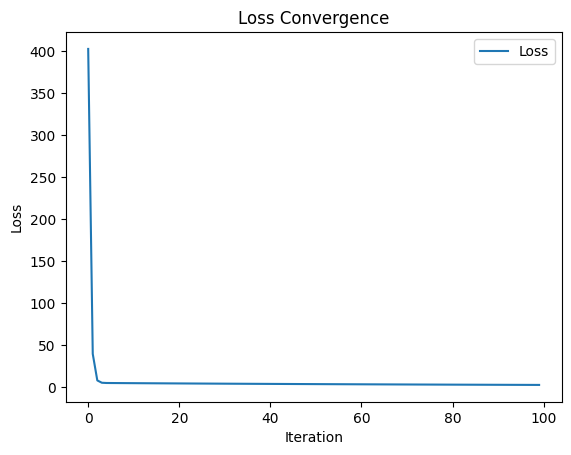

In [4]:
# Câu 5: Vẽ biểu đồ hội tụ của mô hình
plt.plot(range(num_iterations), loss_history, label='Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss Convergence')
plt.legend()
plt.show()

## Pytorch with tensor

In [55]:
import torch
import numpy as np

In [56]:
torch.__version__

'2.6.0+cpu'

## chuyển đổi mảng numpy sang tensor pytorch

In [57]:
arr = np.array([1,2,3,4,5])
print(arr)
print(arr.dtype)
print(type(arr))

[1 2 3 4 5]
int64
<class 'numpy.ndarray'>


In [58]:
x = torch.from_numpy(arr)
print(x)

tensor([1, 2, 3, 4, 5])


In [59]:
print(x.dtype)

torch.int64


In [60]:
print(x.type())

torch.LongTensor


In [66]:
arr2 = np.arange(0.,12.).reshape(4,3)
arr2

array([[ 0.,  1.,  2.],
       [ 3.,  4.,  5.],
       [ 6.,  7.,  8.],
       [ 9., 10., 11.]])

In [67]:
x2 = torch.from_numpy(arr2)
print(x2)
print(x2.type())

tensor([[ 0.,  1.,  2.],
        [ 3.,  4.,  5.],
        [ 6.,  7.,  8.],
        [ 9., 10., 11.]], dtype=torch.float64)
torch.DoubleTensor


copying and sharing

In [71]:
arr = np.arange(0,5)
x = torch.tensor(arr)
print(x)

tensor([0, 1, 2, 3, 4])


In [72]:
arr[0] = 99
print(x)

tensor([0, 1, 2, 3, 4])


### BTVN3: giải thích lý do tại sao cho 2 TH trên

#### Giải thích:
#### Khi tạo tensor từ mảng numpy bằng torch.tensor(arr), PyTorch sẽ tạo một bản sao (copy) của dữ liệu,
#### Không chia sẻ bộ nhớ với mảng numpy gốc. Vì vậy, khi ta thay đổi giá trị của arr,
#### Tensor x không bị ảnh hưởng, nên giá trị của x vẫn giữ nguyên.


In [6]:
#BTVN4: Bạn hãy giúp T tạo tensor với:
# Empyty
empty_tensor = torch.empty(3, 3)
print("Empty Tensor:")
print(empty_tensor)


Empty Tensor:
tensor([[-8.3201e+03,  1.6493e-42,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00]])


In [7]:
# Zeros
zeros_tensor = torch.zeros(3, 3)
print("\nZeros Tensor:")
print(zeros_tensor)



Zeros Tensor:
tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])


In [8]:
# Ones
ones_tensor = torch.ones(3, 3)
print("\nOnes Tensor:")
print(ones_tensor)


Ones Tensor:
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])


In [9]:
# Random
random_tensor = torch.rand(3, 3)
print("\nRandom Tensor:")
print(random_tensor)


Random Tensor:
tensor([[0.3904, 0.6009, 0.2566],
        [0.7936, 0.9408, 0.1332],
        [0.9346, 0.5936, 0.8694]])


In [10]:
# Reshape với view
original_tensor = torch.arange(9)
reshaped_tensor = original_tensor.view(3, 3)
print("\nOriginal Tensor:")
print(original_tensor)
print("\nReshaped Tensor (using view):")
print(reshaped_tensor)


Original Tensor:
tensor([0, 1, 2, 3, 4, 5, 6, 7, 8])

Reshaped Tensor (using view):
tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])


In [5]:
#Dealine 16/03